In [1]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations

# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

/Users/administrator/anaconda3/envs/py37/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/administrator/anaconda3/envs/py37/lib/python3.5/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


/Users/administrator/anaconda3/envs/py37/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


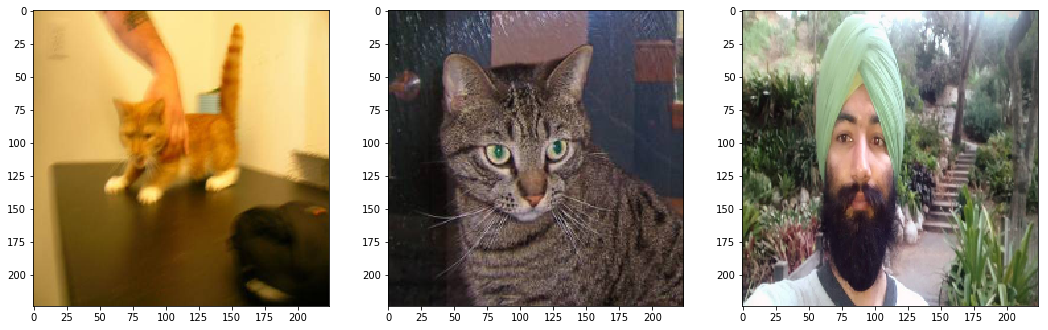

In [51]:
from vis.utils import utils
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

img1 = utils.load_img('/Users/administrator/Research/trainings/learnings/data/cats-and-dogs/train/cats/cat.0.jpg', target_size=(224, 224))
img2 = utils.load_img('/Users/administrator/Research/trainings/learnings/data/cats-and-dogs/train/cats/cat.1.jpg', target_size=(224, 224))

img3= utils.load_img('/Users/administrator/Desktop/test.jpg',target_size=(224, 224))

f, ax = plt.subplots(1, 3)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)


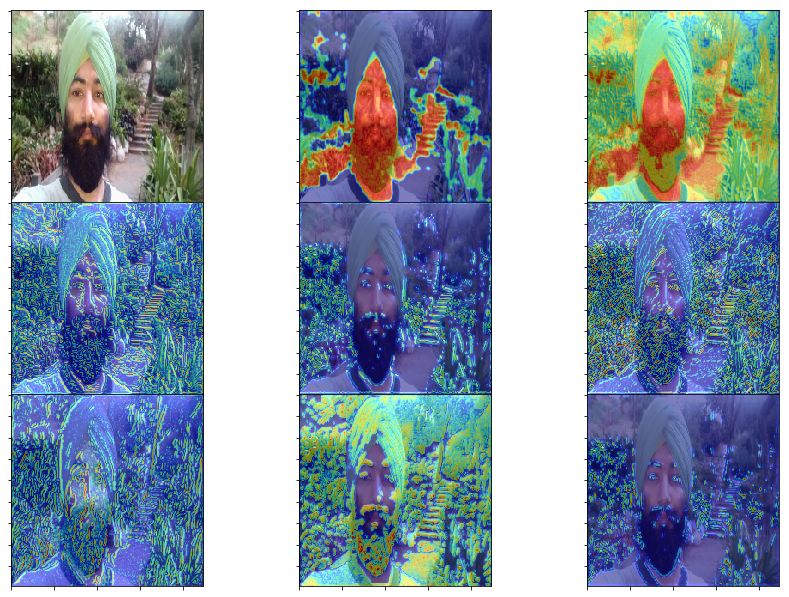

In [99]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations

import matplotlib.gridspec as gridspec
plt.figure(figsize = (3,3))
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0, hspace=0) # set the spacing between axes. 

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

f, ax = plt.subplots(3, 10)
plt.subplots_adjust(left=0, bottom=0, right=2, top=2, wspace=0, hspace=0)
plt.axis('off')

# for i, img in enumerate([img1, img2]):    
#     # 20 is the imagenet index corresponding to `ouzel`
#     grads = visualize_saliency(model, 7, filter_indices=3, seed_input=img)
#     # visualize grads as heatmap
#     ax[i].imshow(grads, cmap='jet')

for ids in range(9):
    ax1 = plt.subplot(gs1[ids])
    grads = visualize_saliency(model, 2, filter_indices=ids*2, seed_input=img3)
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    #ax1.imshow(grads, cmap='jet')
    if ids==0:
        ax1.imshow(img3)
    else:
        ax1.imshow(overlay(img3,grads))
    #plt.show()

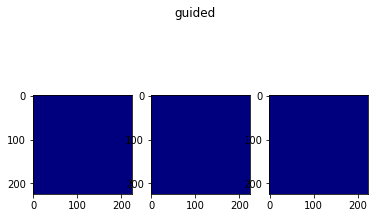

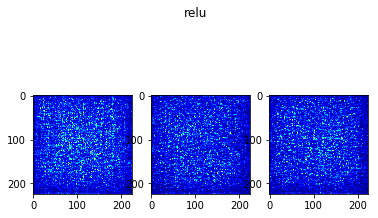

In [84]:
for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 3)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2,img3]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=20, 
                                   seed_input=img, backprop_modifier=modifier)
        # Lets overlay the heatmap onto original image.    
        ax[i].imshow(grads, cmap='jet')